In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import itertools
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module


In [5]:
# Import inputs and outputs
inputs = np.load('initial_inputs.npy')
outputs = np.load('initial_outputs.npy')
print(outputs)

[-22.10828779 -14.60139663 -11.69993246 -16.05376511 -10.06963343
 -15.48708254 -12.68168498 -16.02639977 -17.04923465 -12.74176599
 -27.31639636 -13.52764887 -16.6791152  -16.50715856 -17.81799934
 -26.56182083 -12.75832422 -19.44155762 -28.90327367 -13.70274694
 -29.4270914  -11.56574199 -26.85778644  -7.96677535  -6.70208925
 -32.62566022 -19.98949793  -4.02554228 -13.12278233 -23.1394284 ]


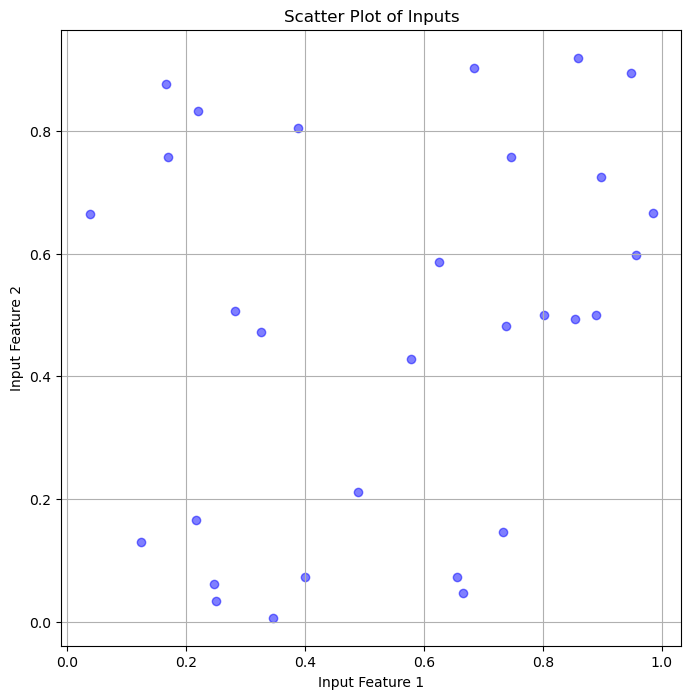

In [6]:
#visualise 2-D inputs
x = inputs[:, 0]  # x coordinates
y = inputs[:, 1]  # y coordinates

plt.figure(figsize=(8, 8))  # Set the figure size
plt.scatter(x, y, color='blue', alpha=0.5)  # Create a scatter plot
plt.title('Scatter Plot of Inputs')  # Set the title of the plot
plt.xlabel('Input Feature 1')  # Set the x-axis label
plt.ylabel('Input Feature 2')  # Set the y-axis label
plt.grid(True)  # Enable grid
plt.show()  # Display the plot




In [7]:
#set up functions
import numpy as np

def generate_grid(n, resolution):
    num_points = int(1 / resolution) + 1
    grid = np.mgrid[[slice(0, 1, 1j*num_points) for _ in range(n)]]
    grid = grid.reshape(n, -1).T  # Reshape to have n columns
    return grid

def generate_binary_combinations(n):
    # Use itertools.product to generate combinations and convert to a NumPy array
    combinations = np.array(list(itertools.product([0, 1], repeat=n)))
    return combinations


In [8]:

# Number of dimensions
n = 4  
corners = generate_binary_combinations(n)

# Initial set of inputs using corners to force choice of points farther from the surface of the hypothesis space
initial_np = np.load('initial_inputs.npy')
initial_inputs = np.vstack([initial_np, corners])  # Append to the inputs
inputs = initial_inputs.copy()  # Start with the initial inputs

# Number of farthest points to find
num_far_points = 10

# Resolution for the grid
resolution = 0.01

# Generate initial grid
grid_points = generate_grid(n, resolution)

# List to store newly added farthest points
new_points = []

for _ in range(num_far_points):
    tree = KDTree(inputs)  # Create a KD-tree for the current inputs
    distances = tree.query(grid_points)[0]  # Find distances to nearest input points
    max_index = np.argmax(distances)  # Index of the farthest point
    farthest_point = grid_points[max_index]  # The farthest point

    # Find the nearest point in inputs to the farthest_point
    tree_initial = KDTree(inputs)
    nearest_dist, nearest_index = tree_initial.query(farthest_point)  # Get nearest
    nearest_point = inputs[nearest_index]

    # Calculate the midpoint
    new_point = (farthest_point + nearest_point) / 2

    # Append to the inputs and new_points
    inputs = np.vstack([inputs, new_point])
    new_points.append(new_point)
    formatted_point = ', '.join(f"{coord:.6f}" for coord in new_point)
    print(f"Added farthest point: [{formatted_point}]")




Added farthest point: [0.193744, 0.682266, 0.875898, 0.571914]
Added farthest point: [0.096872, 0.581133, 0.742949, 0.785957]
Added farthest point: [0.250000, 1.000000, 1.000000, 0.125000]
Added farthest point: [0.869307, 0.241051, 0.734683, 0.501985]
Added farthest point: [0.652405, 0.406982, 0.867655, 0.904046]
Added farthest point: [1.000000, 0.140000, 0.000000, 0.230000]
Added farthest point: [0.538883, 0.329386, 0.212913, 0.124504]
Added farthest point: [0.723491, 0.862814, 0.087702, 0.585847]
Added farthest point: [0.313565, 0.688277, 0.108620, 0.979900]
Added farthest point: [0.000000, 0.250000, 0.995000, 0.070000]


#### BEGIN SECOND PHASE - RUN FROM HERE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import itertools as it
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from brokenaxes import brokenaxes
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Import inputs and outputs
inputs1 = np.load('initial_inputs.npy')
outputs1 = np.load('initial_outputs.npy')
inputs2 = np.load('initial_inputs2.npy')
outputs2 = np.load('initial_outputs2.npy')

# Concatenate inputs and outputs
inputs = np.concatenate((inputs1, inputs2), axis=0)
outputs = np.concatenate((outputs1, outputs2), axis=0)

#Import check
print(len(inputs1),len(inputs2),len(inputs))
print(len(outputs1),len(outputs2),len(outputs))


30 30 60
30 30 60


In [3]:
new_inputs = np.array([[0.193744, 0.682266, 0.875898, 0.571914],[0.096872, 0.581133, 0.742949, 0.785957],[0.869307 ,0.241051, 0.734683 ,0.501985],[0.652405 ,0.406982, 0.867655 ,0.904046],[0.408163 ,0.387755 ,0.346938, 0.428571],[0.428571 ,0.408163, 0.244898, 0.428571],[0.367347,0.408163,0.44898,0.428571],[0.44898, 0.326531, 0.408163, 0.469388],[0.408163, 0.469388, 0.387755, 0.428571],[0.346939, 0.326531, 0.387755, 0.326531],[0,0,0,0.999999],[0.387755, 0.367347, 0.387755, 0.408163],[0.408163, 0.469388, 0.44898,0.55102]])
new_outputs = np.array([-18.5997732797512,-19.0098134788678,-17.8974283732823,-24.3991772654967,0.48315974538091355, -1.57398234896379, 0.15756586283465923, -1.15472702722657,-0.736433194015958,-0.376954710874108,-32.8099376892266,0.2915821062302091, -3.25068467305192])


In [4]:
inputs = np.append(inputs, new_inputs, axis = 0)
outputs = np.append(outputs, new_outputs)
print(np.max(outputs))

0.48315974538091355


#### Visualise New Outputs

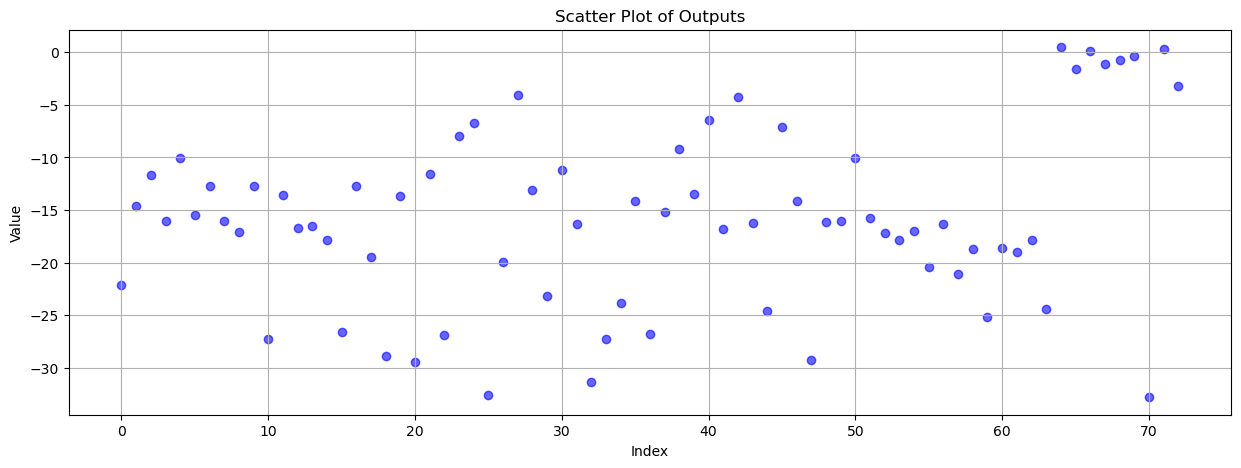

In [5]:
#visualise outputs
# Create indices for your outputs array
indices = np.arange(len(outputs))

plt.figure(figsize=(15, 5))  # Set the figure size
plt.scatter(indices, outputs, color='blue', alpha=0.6)  # Create a scatter plot
plt.title('Scatter Plot of Outputs')  # Set the title of the plot
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.grid(True)  # Enable grid to make the plot easier to read
plt.show()  # Display the plot

In [6]:
# Set N number of dimenstions
N = 4

# Define the kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

# Create and train the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)
gpr.fit(inputs, outputs)

# Generate test points for N dimensions0
num_test_points = 50
test_points = np.array(np.meshgrid(*[np.linspace(0, 1, num_test_points)] * N)).T.reshape(-1, N)

# Predict using the Gaussian Process
y_pred, sigma = gpr.predict(test_points, return_std=True)

# Calculate UCB
kappa = 0.1  # Exploration-exploitation trade-off parameter
ucb = y_pred + kappa * sigma

# Identify the optimal inputs
max_ucb_index = np.argmax(ucb)
optimal_input = test_points[max_ucb_index]

# Round the optimal inputs to six decimal places
optimal_input_rounded = np.round(optimal_input, 6)

# Print the optimal inputs
formatted_query = [f'{item:.6f}' for item in optimal_input_rounded]
formatted_output = f'{formatted_query[0]}-{formatted_query[1]}-{formatted_query[2]}-{formatted_query[3]}'
print(formatted_output)

0.122449-0.428571-0.530612-0.346939


### CHANGE LOG
#### 22ND JUNE 
* Increased kernel parameters to 1* 10-3., restarts to 20
* changed Kappa to 0.5 to move to more exploitative phase
#### 7th JULY 
* Added in new data and cut reduced kappa to 0.2
#### 14th JULY 
* Reduced kappa to 0.1